In [1]:
import sys
sys.path.insert(1, '../')
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.io import loadmat
from numpy.fft import fft, ifft
import random
import matplotlib as mpl
from attributedict.collections import AttributeDict



mpl.rcParams['figure.figsize'] = (19, 6) 
pi = np.pi

In [2]:
# %%
# %     COURSE: Solved challenges in neural time series analysis
# %    SECTION: Spectral analyses
# %      VIDEO: Project 3-2: Topography of alpha-theta ratio
# % Instructor: sincxpress.com
# %
# %%

# % Extract alpha/theta ratio for each channel in two time windows:
# %   [-800 0] and [0 800]. Use trial-specific power. Plot the topographies.
# %   theta=3-8 Hz, alpha=8-13 Hz. Zero-pad to NFFT=1000


In [3]:
eeg = loadmat('../sampleEEGdata.mat')['EEG']
data = eeg['data'].item()
times = np.squeeze(eeg['times'].item())
pnts = len(times)
srate = eeg['srate'].item().item()
data.shape

(64, 640, 99)

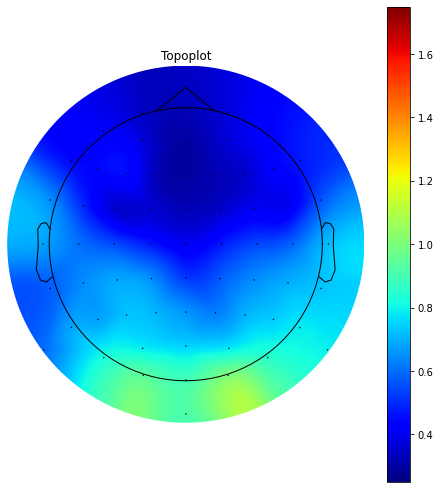

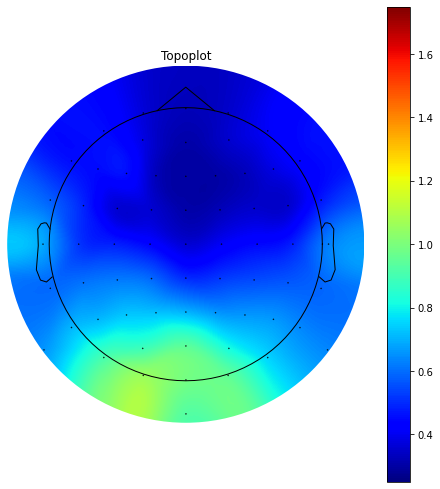

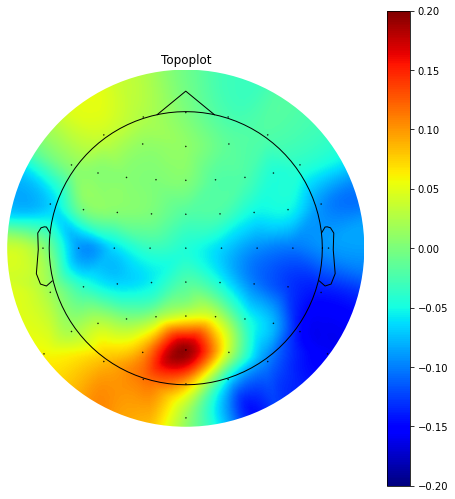

In [15]:
# timing parameters
tidxPre = (times > -800) & (times < 0)  # pre-stimulus
tidxPost = (times > 0) & (times < 800) # post-stimulus
nfft = 1000 # zero-padding!

hz = np.linspace(0, srate, nfft)
# % spectral boundary indices
theta = (hz>=3) & (hz<=8)
alpha = (hz>=8) & (hz<=13)

# %% extract power
# % obtain Fourier coefficients and extract power spectrum
dataXpre = (2*abs(fft(data[:,tidxPre,:], n=nfft, axis=1) / nfft)) ** 2
dataXpre = np.mean(dataXpre, axis=2)[:, :len(hz)]

dataXpst = (2*abs(fft(data[:,tidxPost,:], n=nfft, axis=1) / nfft)) ** 2
dataXpst = np.mean(dataXpst, axis=2)[:, :len(hz)]

# band-limited power
thetaPre = np.mean(dataXpre[:, theta], axis=1)
thetaPst = np.mean(dataXpst[:, theta], axis=1)

alphaPre = np.mean(dataXpre[:, alpha], axis=1)
alphaPst = np.mean(dataXpst[:, alpha], axis=1)


# compute ratios
ratPre = alphaPre / thetaPre
ratPst = alphaPst / thetaPst
rat = ratPst-ratPre

rawclim = np.array([-1,1]) * 0.75 + 1
logclim = np.array([-1,1]) * 0.5

topoPlotIndie(eeg, ratPre, vlim=rawclim, contours=0, cmap="jet")
topoPlotIndie(eeg, ratPst, vlim=rawclim, contours=0, cmap="jet")
topoPlotIndie(eeg, rat, vlim=np.array([-1,1]) * 0.2, contours=0, cmap="jet")

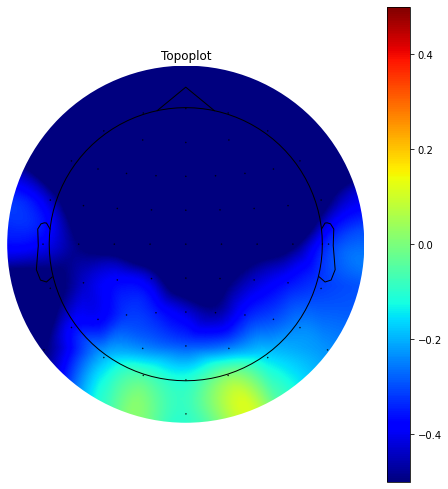

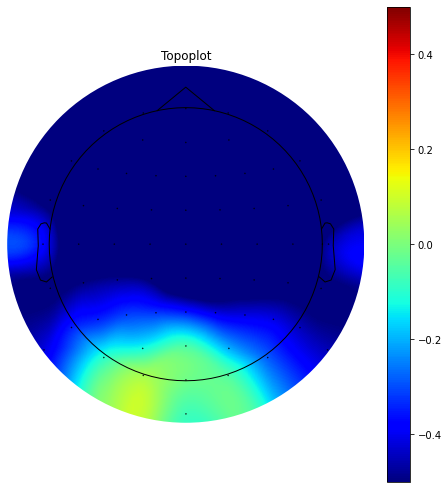

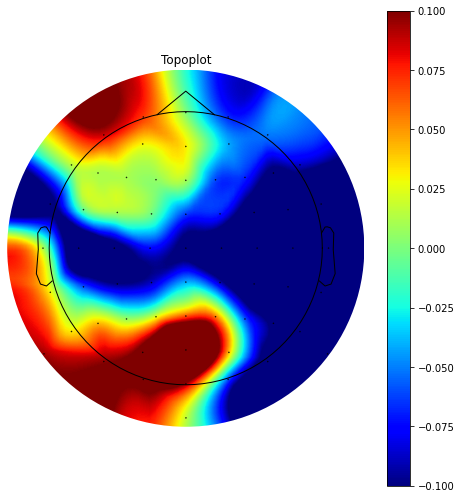

In [18]:
# repeat for log scaled
ratPre = alphaPre / thetaPre
ratPst = alphaPst / thetaPst

ratPre = np.log(ratPre)
ratPst = np.log(ratPst)
rat = ratPst-ratPre

topoPlotIndie(eeg, ratPre, vlim=logclim, contours=0, cmap="jet")
topoPlotIndie(eeg, ratPst, vlim=logclim, contours=0, cmap="jet")
topoPlotIndie(eeg, rat, vlim=logclim/5, contours=0, cmap="jet")

In [6]:
ratPst/ratPre

array([ 0.93647721,  0.90483993,  0.97170446,  0.99541543,  0.9864763 ,
        0.98543736,  0.98024751,  1.24057108,  1.00202538,  0.99019277,
        1.00358357,  1.0996307 ,  1.19739905,  1.32048305,  0.98604954,
        0.9556667 ,  1.14680255,  1.26347131,  1.19919181,  0.93984565,
        0.98972665,  0.89672197,  0.91857274,  0.81845298,  0.52317771,
        0.52427353, -0.61972226,  0.7917677 ,  0.11067031,  0.22978487,
        0.86059219,  1.06590607,  0.99768105,  1.06680781,  1.06157183,
        1.04149361,  0.97418628,  0.99255844,  1.0544812 ,  1.06511196,
        1.1273568 ,  1.11738133,  1.30080792,  1.14762999,  1.15244658,
        1.06695425,  1.05781526,  1.12621136,  1.19823868,  1.30854478,
        1.36079471,  1.40699319,  1.68189831,  1.55010974,  1.3802306 ,
        1.16025118,  0.88875603,  1.16543964,  1.36483587,  1.82723625,
        1.94926384,  1.73422931,  0.8183175 ,  8.64590909])

In [7]:
ratPre

array([-1.06566924, -0.87652503, -0.98913142, -1.12212368, -0.80160664,
       -0.80739963, -0.80108398, -0.44922403, -0.72437115, -1.03703614,
       -1.02443526, -0.75175929, -0.60958236, -0.50728351, -0.39416241,
       -0.54513304, -0.43277144, -0.38172627, -0.44396224, -0.35267567,
       -0.32025533, -0.38541474, -0.37647766, -0.50151672, -0.20082008,
       -0.24562759, -0.07299152, -0.08784532, -0.11551659, -0.29739583,
       -0.42268526, -0.65277779, -1.12200114, -0.98123834, -0.84224082,
       -0.99926739, -1.21654868, -1.2142713 , -1.13870461, -1.0463047 ,
       -0.85829373, -0.75808316, -0.587163  , -0.90979396, -0.90269578,
       -1.04796861, -1.11391485, -0.89984487, -0.74827549, -0.61756306,
       -0.53708426, -0.33652804, -0.31672939, -0.36670429, -0.44007233,
       -0.56641034, -0.47415315, -0.35914532, -0.30160419, -0.24442522,
       -0.23125652, -0.16553779, -0.25647989, -0.00666629])